In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from IPython.core.display import HTML
from IPython.core.display import display

from scipy import ndimage

In [13]:

param_table = [1.65, 1.28, 1.03, 0.84, 0.67, 0.52, 0.39, 0.25];    

structure_element = [[0, 1, 0],[1, 1, 1],[0, 1, 0],]

In [14]:
outfile          = 'eventframe4.npy'

# numpy.load(file, mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')
#    Load arrays or pickled objects from .npy, .npz or pickled files.
#    result : array, tuple, dict, etc.
eventframe       = np.load(outfile)

# np.set_printoptions(threshold=np.inf)

# print(len(eventframe[1]))
# for idx, frame in enumerate(eventframe):
#     print(idx)
#     print(len(frame[0]))
#     print(frame)
#     break

    

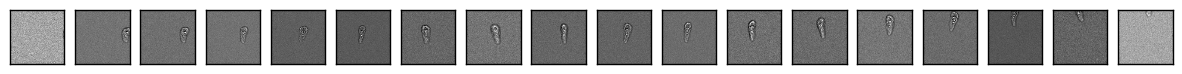

In [15]:
# matplotlib.pyplot.subplot(*args, **kwargs)
#    subplot(nrows, ncols, plot_number)
fig, figure = plt.subplots(1, len(eventframe), figsize=(15, 2*len(eventframe)))

for idx, frame in enumerate(eventframe):
    figure[idx].imshow(frame, cmap=cm.gray)
    figure[idx].set_xticks([]), figure[idx].set_yticks([])

plt.show()

frame 0
[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0 17 ..., 15  0  0]
 ..., 
 [ 0  0  9 ..., 22  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]
frame 1
[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0 19 ...,  4  0  0]
 ..., 
 [ 0  0  9 ..., 14  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]
frame 2
[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  7 ..., 10  0  0]
 ..., 
 [ 0  0  5 ..., 29  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]
frame 3
[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0 11 ..., 12  0  0]
 ..., 
 [ 0  0  6 ..., 14  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]
frame 4
[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0 18 ..., 14  0  0]
 ..., 
 [ 0  0 18 ..., 24  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]
frame 5
[[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0 19 ..., 19  0  0]
 ..., 
 [ 0  0  4 ..., 17  0  0]
 [ 0  0  0 ...,  0  0

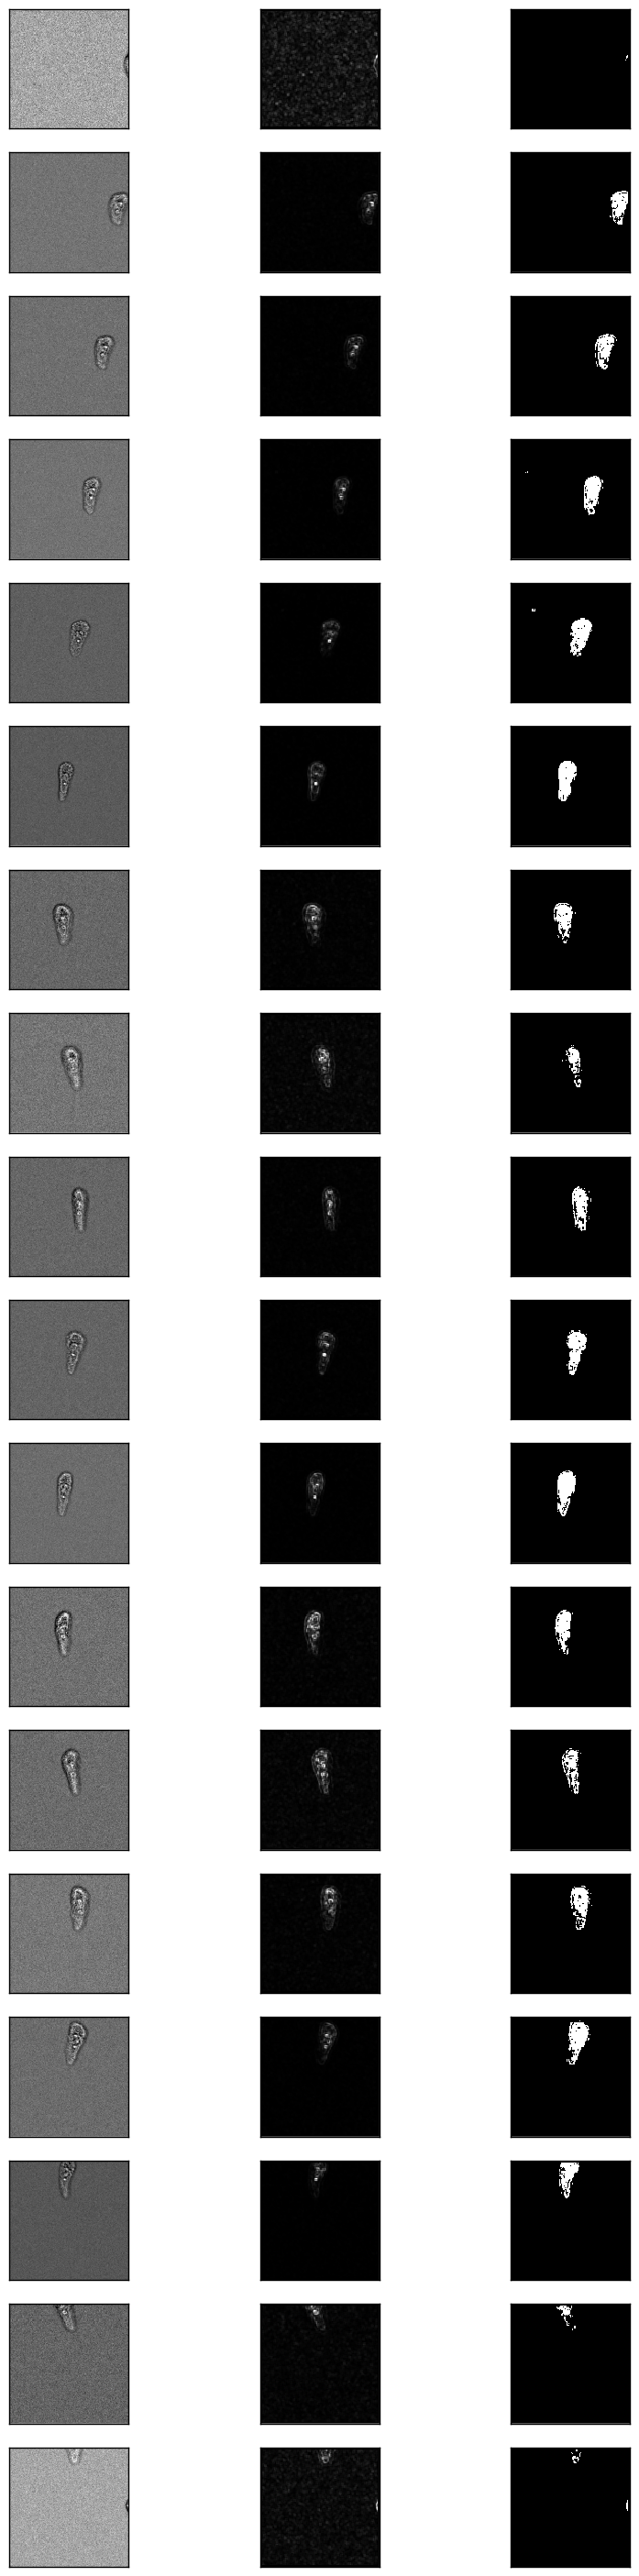

In [32]:
########### Algorithm 1
## the simplest image segmentation using a convolutional variance method


# numpy.zeros(shape, dtype=float, order='C')
variance         = np.zeros((128, 128), dtype=np.int16)
variance_binary  = np.zeros(variance.shape, dtype=np.int16)
    
fvar  = open('var.golden.dat' , 'w')
fvarb = open('varb.golden.dat', 'w')

fig, figure = plt.subplots(len(eventframe), 3, figsize=(10, 2*len(eventframe)))

ii = 0
for idx, frame in enumerate(eventframe):
    print('frame ' + str(ii))
#     if ii != 1:
#         ii += 1
#         continue
 
#     if ii == 2:
#         break
    
    
    # step 1. generating mean-filtered and varinace images
    for j in range(2, 126):
        for i in range(2, 126):
            window = [[frame[j-1,i-1], frame[j-1,i], frame[j-1,i+1]],
                      [frame[j  ,i-1], frame[j  ,i], frame[j  ,i+1]],
                      [frame[j+1,i-1], frame[j+1,i], frame[j+1,i+1]]]
            
            # numpy.var(a, axis=None, dtype=None, out=None, ddof=0)
            variance[j,i] = np.var(window);

    
    # step 2. thresholding a variance image    
    tmp = (variance > 50*1.28+20); 
    variance_binary = tmp.astype(int)
    
    print(variance)
    for row in variance:
        for val in row:
            fvar.write(str(val) + ' ')
        fvar.write('\n')
    fvar.write('\n')
    
    for row in variance_binary:
        for val in row:
            fvarb.write(str(val) + ' ')
        fvarb.write('\n')
    fvarb.write('\n')

    
    # show results
    figure[idx, 0].imshow(frame,            cmap=cm.gray,  interpolation='None')
    figure[idx, 1].imshow(variance,         cmap=cm.gray,  interpolation='None')
    figure[idx, 2].imshow(variance_binary,  cmap=cm.gray,  interpolation='None')
    
    # remove axis ticks
    for fig in figure[idx]:
        fig.set_xticks([])
        fig.set_yticks([])
         
    ii += 1
plt.show()

In [30]:
variance[2]

array([ 0,  0, 19,  5,  8,  9, 13,  8,  9,  6,  6,  4,  5,  8, 18, 17, 12,
        5,  8, 11, 10,  8,  7,  8,  7,  9, 13, 14,  9, 14, 11,  8,  6,  6,
       10,  7,  7,  2,  3,  6,  6, 12, 12, 12,  8,  9, 15, 16, 16, 11,  9,
       16, 14, 16, 10, 11,  7,  8, 17, 16, 14,  3,  6,  5,  7,  8, 12, 11,
        8,  9, 14, 15, 17, 11, 15, 19, 31, 24, 19,  4,  4,  5,  7, 18, 20,
       20,  6,  2,  7, 18, 24, 23, 14,  4, 12, 14, 18,  8, 18, 23, 25,  6,
        4,  6,  5,  6,  2,  8, 14, 16, 16, 13, 11, 12, 10, 10,  5, 10,  9,
       11,  5,  7, 29, 22, 20,  4,  0,  0], dtype=int16)

In [ ]:
########### Algorithm 2
## more accruate image segmentation algorithm using a convolutional variance method

mean             = np.zeros((128, 128), dtype=np.int16)
variance         = np.zeros((128, 128), dtype=np.int16)
mean_binary      = np.zeros(mean.shape, dtype=bool)
variance_binary  = np.zeros(variance.shape, dtype=bool)

fig, figure = plt.subplots(len(eventframe), 5, figsize=(10, 2*len(eventframe)))

for idx, frame in enumerate(eventframe):
        
    # step 1. generating mean-filtered and varinace images
    for j in range(2, 126):
        for i in range(2, 126):
            window = [[frame[j-1,i-1], frame[j-1,i], frame[j-1,i+1]],
                      [frame[j  ,i-1], frame[j  ,i], frame[j  ,i+1]],
                      [frame[j+1,i-1], frame[j+1,i], frame[j+1,i+1]]]
            # numpy.mean(a, axis=None, dtype=None, out=None, keepdims=False)
            #    Compute the arithmetic mean along the specified axis.
            #  
            #    Returns the average of the array elements. The average is taken over
            #    the flattened array by default, otherwise over the specified axis.
            #    float64 intermediate and return values are used for integer inputs.
            mean[j,i]     = np.mean(window, dtype=np.int16);
            variance[j,i] = np.var(window, dtype=np.int16);

    # step 2. gaussian filtering to remove noise
    # scipy.ndimage.filters.gaussian_filter(input, sigma, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
    #    input : array_like
    #               Input array to filter.
    #    sigma : scalar or sequence of scalars
    #               Standard deviation for Gaussian kernel. The standard deviations
    #               of the Gaussian filter are given for each axis as a sequence,
    #               or as a single number, in which case it is equal for all axes.
    # 
    #    gaussian_filter : ndarray
    #                         Returned array of same shape as input.
    mean             = ndimage.gaussian_filter(mean, 1)       
   
    # step 3. thresholding a mean-filtered image
    mean_binary = (mean > 1)+ (mean < -1)
    
    # scipy.ndimage.morphology.binary_opening(input, structure=None, iterations=1, output=None, origin=0)
    #    Multi-dimensional binary opening with the given structuring element.
    #
    #    The opening of an input image by a structuring element is the dilation of the erosion of the 
    #    image by the structuring element.
    #
    #   input : array_like
    #              Binary array_like to be opened. Non-zero (True) elements form the subset to be opened.
    #   structure : array_like, optional
    #                  Structuring element used for the opening. Non-zero elements are considered True.
    #                  If no structuring element is provided an element is generated with a square connectivity
    #                  equal to one (i.e., only nearest neighbors are connected to the center, diagonally-connected
    #                  elements are not considered neighbors).
    #
    #   binary_opening : ndarray of bools
    #                       Opening of the input by the structuring element
    mean_binary = ndimage.binary_opening(mean_binary, structure_element)

    # step 4. calculating a binary-thresholding value 
    num_mean  = sum(sum(mean_binary))    
    idx_table = np.int(round(num_mean*100/(128*128)/5+0.5))
    param = param_table[idx_table]
             
    # step 5. thresholding a variance image    
    variance_binary = (variance > 50*param+20) + mean_binary;
    
    
    # show results
    figure[idx, 0].imshow(frame,            cmap=cm.gray,  interpolation='None')
    figure[idx, 1].imshow(mean,             cmap=cm.gray,  interpolation='None')
    figure[idx, 2].imshow(mean_binary,      cmap=cm.gray,  interpolation='None')
    figure[idx, 3].imshow(variance,         cmap=cm.gray,  interpolation='None')
    figure[idx, 4].imshow(variance_binary,  cmap=cm.gray,  interpolation='None')
    
    # remove axis ticks
    for fig in figure[idx]:
        fig.set_xticks([])
        fig.set_yticks([])
                
plt.show()

In [ ]:
np.mean([13,3,0,1,-1,-3,4,4,-1])

In [ ]:
np.var([13,3,0,1,-1,-3,4,4,-1])

In [ ]:
np.mean([3,0,-1,-1,-1,4,4,-1,1])

In [ ]:
np.var([3,0,-1,-1,-1,4,4,-1,1])